In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [65]:
df = pd.read_csv('dataset.csv')

## questo per Chair vs Tutto

In [66]:
legend_properties = {'weight':'bold'}

In [67]:
mask1 = (df['Class']== "toilet") & (df['Prediction']== "chair")
mask2 = (df['Class']== "chair") & (df['Prediction']== "toilet")
mask3 = (df['Class']== "toilet") & (df['Prediction']== "toilet")
mask4 = (df['Class']== "chair") & (df['Prediction']== "chair")

mask = mask1  | mask2 |  mask3 | mask4

## questo per Chair vs Toilet

In [25]:
mask1 = (df['Class']== "toilet") & (df['Prediction']== "chair")
mask2 = (df['Class']== "chair") & (df['Prediction']== "toilet")
mask3 = (df['Class']== "toilet") & (df['Prediction']== "toilet")
mask4 = (df['Class']== "chair") & (df['Prediction']== "chair")

mask = mask1  | mask2 |  mask3 | mask4

In [68]:
df['True'] = np.where(df['Class'] == "chair" , 1, 0)

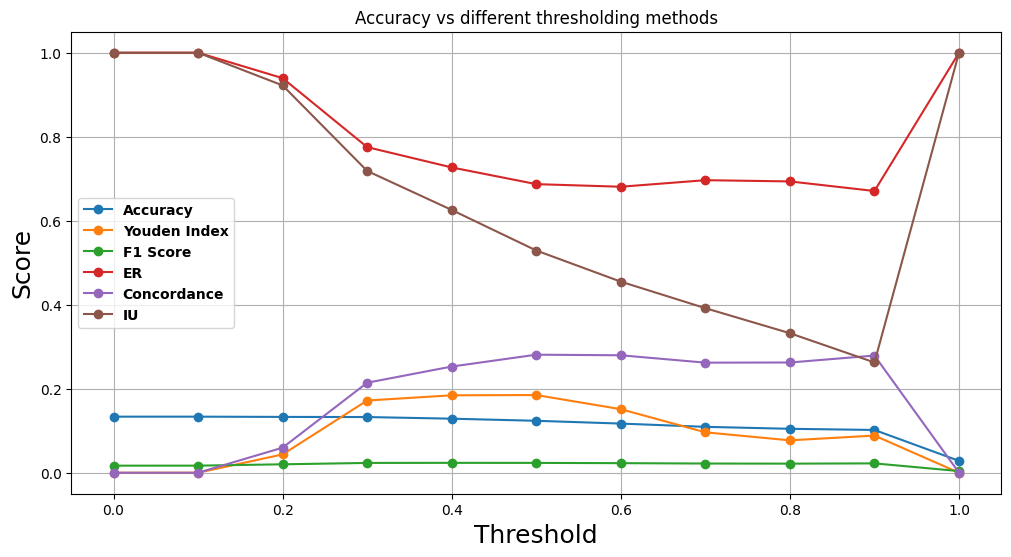

In [60]:
# Define thresholds
thresholds = np.arange(0.0, 1.1, 0.1)

# Initialize lists to store results
youden_indices = []
accuracies = []
f1_scores = []
sensitivities = []
specificities = []
ER = []
Concordance=[]
IU = []
AUC = 0.67
# Iterate over thresholds
for threshold in thresholds:
    # Apply threshold to predictions
    df['Predicted_Label'] = df['Conf'].apply(lambda x: 'chair' if x >= threshold else 'toilet')

    # Compute confusion matrix
    cm = confusion_matrix(df['Class'], df['Predicted_Label'], labels=['chair', 'toilet'])
    tn, fp, fn, tp = cm.ravel()

    # Compute Youden's index
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    youden_index = sensitivity + specificity - 1

    # Compute accuracy and F1 score
    accuracy = accuracy_score(df['Class'], df['Predicted_Label'])
    f1 = f1_score(df['Class'], df['Predicted_Label'], average='macro')

    # Append results to lists
    youden_indices.append(youden_index)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    ER.append(np.sqrt((1-sensitivity)**2 + (1-specificity)**2))
    Concordance.append(sensitivity*specificity)
    IU.append(abs(sensitivity - AUC) + abs(specificity - AUC) )

# Create a dataframe with the results
results_df = pd.DataFrame({
    'Threshold': thresholds,
    'Youden_Index': youden_indices,
    'Accuracy': accuracies,
    'F1_Score': f1_scores,
    'ER':ER,
    'Concordance':Concordance,
    'IU':IU
})

# Create a separate dataframe for sensitivities and specificities
sens_spec_df = pd.DataFrame({
    'Threshold': thresholds,
    'Sensitivity': sensitivities,
    'Specificity': specificities
})


# Plot Youden's indices, accuracies, and F1 scores
plt.figure(figsize=(12, 6))

# Plot accuracies
plt.plot(results_df['Threshold'], results_df['Accuracy'], label='Accuracy', marker='o')

# Plot Youden's indices
plt.plot(results_df['Threshold'], results_df['Youden_Index'], label='Youden Index', marker='o')

# Plot F1 scores
plt.plot(results_df['Threshold'], results_df['F1_Score'], label='F1 Score', marker='o')

# Plot F1 scores
plt.plot(results_df['Threshold'], results_df['ER'], label='ER', marker='o')

# Plot F1 scores
plt.plot(results_df['Threshold'], results_df['Concordance'], label='Concordance', marker='o')

plt.plot(results_df['Threshold'], results_df['IU'], label='IU', marker='o')

# Add labels and title

plt.title('Accuracy vs different thresholding methods')

plt.xlabel('Threshold', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.legend(prop=legend_properties)
plt.grid(True)

In [28]:
df.columns

Index(['Class', 'Prediction', 'Conf', 'Predicted_Label', 'True'], dtype='object')

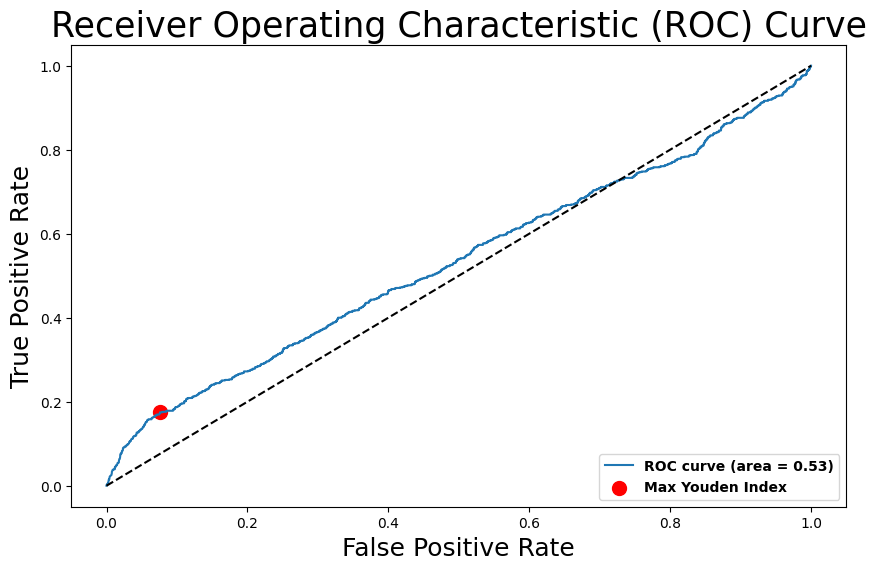

Max Youden Index: 0.09883402974069067
Threshold for Max Youden Index: 0.99996424


In [69]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(df['True'].values, df['Conf'].values)

# Compute the Youden index for each threshold
youden_index = tpr - fpr
max_youden_index = np.argmax(youden_index)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[max_youden_index], tpr[max_youden_index], color='red',s=100,label='Max Youden Index')

plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=25)

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)

plt.legend(loc='lower right',prop=legend_properties)

plt.show()

# Print the Youden index and the corresponding threshold
print('Max Youden Index:', youden_index[max_youden_index])
print('Threshold for Max Youden Index:', thresholds[max_youden_index])

In [63]:
threshold = 0.9895266
# Apply the threshold to the 'Conf' column to make predictions
df['Predicted_Class'] = np.where(df['Conf'] >= threshold, df['Prediction'], 'not_' + df['Prediction'])
# Compute the confusion matrix for the class "chair"
y_true = df['Class'] == 'chair'
y_pred = df['Predicted_Class'] == 'chair'
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix for the class 'chair':")
print(cm)

Confusion Matrix for the class 'chair':
[[7254  329]
 [ 528  640]]


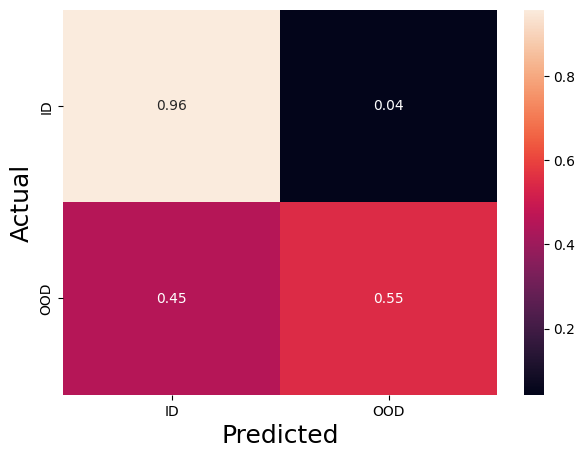

In [64]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["ID","OOD"], yticklabels=["ID","OOD"])
plt.ylabel('Actual',fontsize=18)
plt.xlabel('Predicted',fontsize=18)
plt.show(block=False)

col = 0
for idx in np.arange(cmn.size).reshape(cmn.shape)[:, col]:
    ax.texts[idx].set_fontweight('bold')